# Quantitative Methods

You have seen a great deal of numeric and string variables in the datasets we've presented to you. You've manipulated basic text to make city, state, and county variables, for example. You have also created new numeric variables by calculating averages and percentages from other numeric variables. You will do a lot more with string variables next chapter; This chapter will be dedicated to taking a few steps further in the quantitative analysis of numbers. Regarding quantitative analysis, you have already calculated sums, percentages, and averages. You have been introduced to descriptive statistics in pandas' `describe()`. In the data visualization chapter you saw how two variables relate to one another on a two-dimensional plane. You have even learned how to group your data by different categories like state and country and thus compare and contrast your data. 

This chapter builds upon those same skills but adds some statistical rigor. Often it is enough to present numbers to an audience as naturally as possible with simple summaries, averages, etc. These descriptive statistics are familiar to most audiences. However, this familiarity comes with the risk of making claims and drawing conclusions that are often not warranted. Researchers must provide evidence that observed differences between groups (social groups, experimental and control groups, city/state/national populations, etc.) are meaningful, not attributable to chance, and not attributable to measurement error or bias. Statistics can help you back up your conclusions as long as you are rigorous and _transparent_ about your choice of statistical procedure!

This is not an introduction to statistics course, and this single chapter cannot pretend to cover the breadth of the many models and procedures in statistics. Instead, we present applied examples of a handful of very commonly used statistical procedures that beginner social science researchers should know. The first set of statistical procedures are sample distribution tests, which determine whether one variable's observed values are different between groups in your sample data. The second set of procedures are about correlation and linear relationships, or how an observed quantity of _x_ matches (or influences!) the observed quantities of _y_.  

This chapter will use the stats package `pingouin`, which __does not come pre-installed__ in anaconda. To get it, go to your Jupyter Lab launcher (the `+` button in the file navigator), open a new terminal, and install with the following command: `conda install conda-forge::pingouin`. Then you should be able to import the package in the cell below. We will also use SciPy which is a more established statistics package, as well as NumPy for some simpler vector math. 

This chapter you will see the same procedures run twice in every code cell for SciPy and pingouin functions. This is to show that you are not tied to one single package in Python, and that functions are not perfectly identical! You may often see one function return a slightly different statistic on the very same data. Also, different packages return different classes of objects in different manners, and either may be more or less convenient for you. 

In [1]:
# This code cell will be in every one of our chapters in Jupyter Notebook
# The function allows you to see every line of output when the code has multiple lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load packages
import pandas as pd
import numpy as np
import scipy.stats as st
import pingouin as pg
import matplotlib.pyplot as plt

# Loading the Cross-National Time-Series data

For our quantitative analysis, we will pull a few variables from the Cross-National Time-Series data. Below is a description of the variables you'll extract from the `cnts_data.xls` dataset:

|Variable|Description|
|:--|:--|
|country|Country name|
|year|Year of data record|
|pop2|Population density (pop$\div$landmass). Multiply by '0.1'|
|economics2|Gross Domestic Product|
|polit13|Legislative Effectiveness|
|legis03|Legislative Effectiveness|
|legis04|Competitiveness of legislative nominating process|
|legis05|Party coalitions|
|legis06|Party legitimacy|
|legis08|Composite index of legis03 through legis06|

Country and year are necessary for identifying your observations. Population density and GDP will be your two __continuous__ variables. You will also analyze and compare two __ordinal__ variables: Legislative effectiveness and a composite of the last three legislative variables (legis04-legis06). More on what we mean by continuous and ordinal variables later. First extract the variables in question with `read_excel`. 

Instead of loading the full dataset and then sorting through a large number of variables to clean up, you can easily pick which variables to read in with the 'usecols=' argument. You just provide a list of column names, which would be the first row in the data file. The read function then extracts only those columns from the file.

In [2]:
cnts = pd.read_excel('../../Data/CrossNationalTimeSeries/cnts_data.xls', usecols=['country','year','pop2','economics2','polit13','legis03','legis04','legis05','legis06','legis08'])
cnts[cnts['year']==1999].head()

,country,year,economics2,legis03,legis04,legis05,legis06,legis08,polit13,pop2
74,AFGHANISTAN,1999,NaN,0.0,0.0,0.0,0.0,0.0,0.0,871.0
159,ALBANIA,1999,1174.0,2.0,2.0,2.0,2.0,8.0,2.0,2846.0
207,ALGERIA,1999,1726.0,1.0,1.0,2.0,1.0,5.0,2.0,325.0
242,ANDORRA,1999,14939.0,3.0,2.0,3.0,3.0,11.0,3.0,3611.0
277,ANGOLA,1999,588.0,1.0,2.0,3.0,1.0,7.0,1.0,254.0


Next you'll perform two transformations. First, make a new `pop` variable where you multiply the `pop2` column by `0.1` as the codebook requests. 

In [3]:
# shift the decimal point to the left by multiplying by 0.1
cnts['pop'] = cnts['pop2']*0.1

In the raw data there is a variable called `legis08'` that represents the sum of all the values present in legis03, legis04, legis05, and legis06. This kind of variable is called a _composite_ because it is composed of multiple variables. Sometimes the composites are a sum, like legis08. Other times it can be a division or a multiplication. In any case, `legis08` represents something like the quality of a country's democratic institutions. We want to compare that composite to another variable called `polit13`, which is a measure of the legislature's effectiveness. 

The problem is that `legis03` is a separate measure of "legislative effectiveness" and at the same time is a numerical part of the `legis08` composite. So even though polit13 and legis03 are different variables, if we did any statistical tests on the relationship between polit13 and legis08, our statistics would be biased and our results would be falsifiable. 

Our solution is to make a new composite variable without `legis03`. Simply add all of legis04, 05, and 06 into a new variable called `leg_legit`.

In [4]:
# add legis04, legis05, and legis06 into a new variable
cnts['leg_legit'] =  cnts['legis04']+cnts['legis05']+cnts['legis06']


cnts.rename(columns={'economics2': 'gdp',
                     'polit13':'leg_eff'}, inplace=True)
cnts.tail()

,country,year,gdp,legis03,legis04,legis05,legis06,legis08,leg_eff,pop2,pop,leg_legit
15724,ZAMBIA,2005,NaN,2.0,1.0,3.0,3.0,9.0,2.0,398.0,39.8,7.0
15725,ZAMBIA,2006,NaN,2.0,1.0,3.0,3.0,9.0,2.0,401.0,40.1,7.0
15726,ZAMBIA,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409.0,40.9,NaN
15727,ZAMBIA,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417.0,41.7,NaN
15728,ZAMBIA,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.0,42.5,NaN


## Continuous versus ordinal variables

You now have two sets of two variables. One set, `pop` and `gdp` are continuous, while the second set, `leg_eff` and `leg_legit` are ordinal. Although all four variables use numbers to represent something about the country, the numbers are used in different ways. 

In the __continuous__ set, values for population density and GDP are quantifying a measure that researchers believe represents some amount of something. GDP is a calculation of market value in a territory, and the GDP per-capita calculation is a proxy of living standards. Population density is the population divided by landmass area and represents how populous a country is relative to its size. These are numbers drawn from real measurements. Consider the term 'continuous' itself as a hint too: The values can increase and decrease continuously at unit of measurement until some logical limit. Height and the population of a country are continuous and have some minimums and maximums. The percent of the day that a human sleeps is continuous; so is the number of minutes or hours spent sleeping. 

On the __ordinal__ set, these numbers represent more abstract categories that researchers have chosen to give to the unit of observation. Legislative effectiveness is some measure from 0, _not effective_, to 3, _very effective. Out composite `leg_legit` variable adds the same zero to three point categories of three other variables, making its values range from zero to nine. But we can not define _how much_ an observation changes from one category to the next. We _only_ know that these categories have some relative _direction_ higher or lower than another. Some further examples: Movie ratings from zero to ten; Highest level of education; Five hot peppers next to an item on a menu. If you have ever taken a survey and given your agreement or disagreement on a scale, you provided researchers with ordinal data.

Another kind of variable related to ordinal variables are __nominal__ variables. We won't discuss these in this chapter. Nominal variable examples would be race and ethnicity categories, gender, ice cream flavor, or flower species. The differences between these kinds of categories mean nothing in any direction and represent no real quantities. Thus, nominal variables have few quantitative/statistical applications beyond frequencies and proportions. 

#### Introducing the variables

Look at the  the summaries of the variables `gdp` and `pop` with the '.describe()' function and with histograms. In the next cell you'll run the same code on the `leg_eff` and `leg_legit` variables. Each set of variables gives very different summaries because they are of a very different nature. 

__Note:__ These distributions are from data collected for _every_ country on record since 1815 or the country's founding year if later. So keep in mind gdp and population by definition change over time, and that althy countries are a minority. This will skew the distribution of values towards the left/lower quantities.

,gdp,pop
count,7532.000000,15583.000000
mean,2859.449018,304.240339
std,5761.634416,1605.582465
min,18.000000,0.300000
25%,231.000000,22.450000
50%,650.500000,101.500000
75%,2187.250000,240.500000
max,44797.000000,34000.000000


<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'GDP')

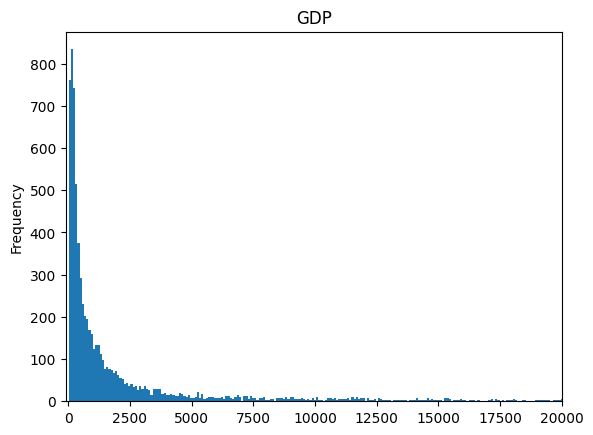

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Population Density')

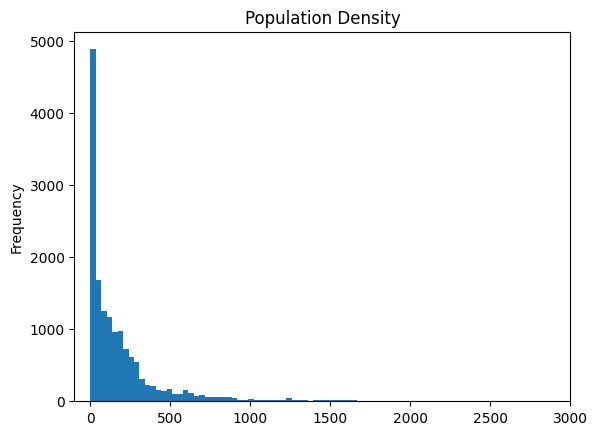

In [5]:
pd.concat([cnts['gdp'], cnts['pop']], axis=1).describe()

# check distribution with a histogram
cnts['gdp'].plot(kind='hist',bins=500, xlim=(-100,20000))
plt.title('GDP')
plt.show()
cnts['pop'].plot(kind='hist',bins=1000, xlim=(-100,3000))
plt.title('Population Density')

Compare the continuous variables above to the ordinal variables below. Instead of a curved line of frequencies we see bars stacked around integers. Using .describe() we see more whole numbers in the minimums, maximums, and percentiles. This is because the ordinal variables' range from zero to three and zero to nine in leg_eff and leg_legit, respectively, with no smaller decimal values between. Note that the distribution of categories is kind of flat for `leg_eff` and somewhat bi-modal (has two peaks) for our composite `leg_legit` variable. The latter distribution might suggest that countries' legislative bodies are generally ranked either high or low. 

,leg_eff,leg_legit
count,14133.00000,8875.000000
mean,1.69320,4.305690
std,1.03038,2.986667
min,0.00000,0.000000
25%,1.00000,1.000000
50%,2.00000,5.000000
75%,3.00000,7.000000
max,3.00000,9.000000


<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Legislative Effectiveness')

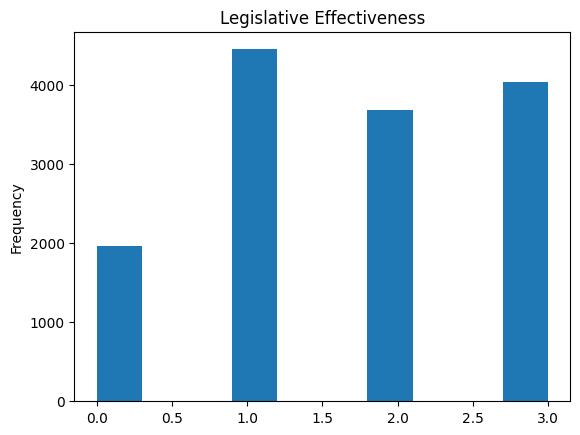

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Composite: legislative competitiveness, coalitions, legitimacy')

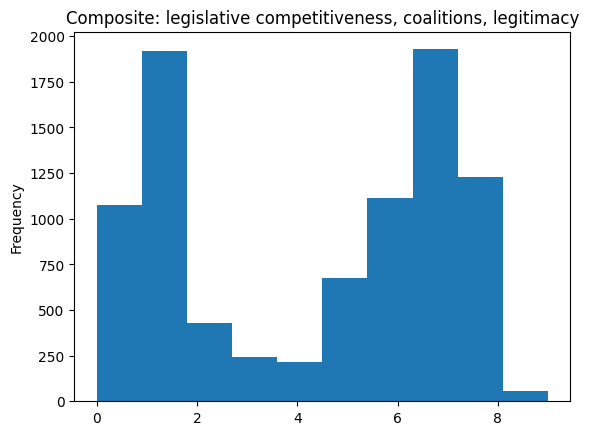

In [6]:
pd.concat([cnts['leg_eff'], cnts['leg_legit']], axis=1).describe()

# check distribution with a histogram
cnts['leg_eff'].plot(kind='hist')
plt.title('Legislative Effectiveness')
plt.show()
cnts['leg_legit'].plot(kind='hist')
plt.title('Composite: legislative competitiveness, coalitions, legitimacy')

## Correlation
To measure the association between two __continuous__ numeric variables, you can use Pearson's product-moment correlation coefficient, or _$\rho$_ (pronounced Rho). The correlation coefficient is a number between negative one and one. It is like a proportion where $\rho=-1$ is a perfect negative correlation (higher _x_ associated with lower _y_); $\rho=0$ means there is no association between _x_ and _y_; and $\rho=1$ means there is a perfect positive correlation. When we are talking about sample data from real-world research, you use the letter "$r$" instead of the greek $\rho$, and that is how we will refer to the correlation coefficient in this chapter.

Remember the scatterplots you drew in the data visualization chapter? Those plots are the visual equivalent a correlation between two variables. Take a look at how GDP and population density plot against one another for the year 1999. 

On your own, try replacing `cnts_99` with the full `cnts` dataframe in the plotting function to see why we would isolate a single year of observations.

<Axes: xlabel='gdp', ylabel='pop'>

(-100.0, 3500.0)

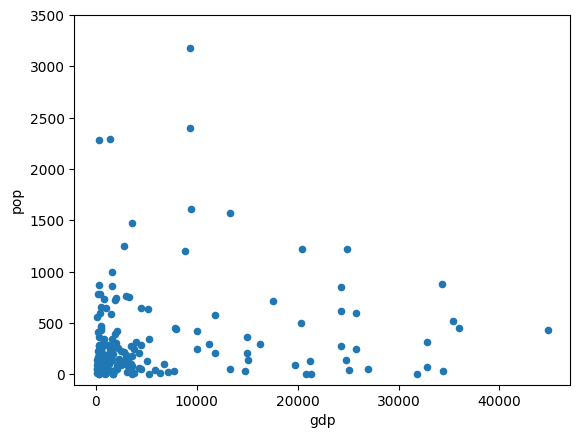

In [7]:
cnts_99 = cnts[cnts['year']==1999].dropna() # drop missing values from the df, correlation functions are sensitive to missingness

cnts_99.plot(kind='scatter', x='gdp', y='pop')
plt.ylim(-100,3500) # zoom in past the major outliers

The points are spaced out and it does not _look_ like there is a strong association. We can definitely see the relationship is positive, but instead of guessing about the scatterplot you can go ahead and calculate the sample correlation and put a number on that association. There are functions to calculate correlation in numpy, SciPy, and pingouin. First, however, we want to pull the curtain back on these statistical functions and the math behind them to show you how programming languages can perform stats like a student would using a pencil and a calculator. 

In a statistics textbook, the sample correlation might be written out with the following math formula (there are multiple ways to express this so your stats books may vary):

$r_{xy}=$ $\frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        (\sqrt{n\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{n\sum_{i=1}^{n}(y_i-\bar{y})^2})}$

In order to show how the greek letters and algebraic symbols become applied math code, we provide you with the code to calculate the correlation coefficient by hand. For clarity, below is a key for the symbols and python functions for the formula above:

- $n$ is the sample size, or number of observations. In python it is `len(x)`
- $x_i$ is a single observation of _x_. 
- $\bar{x}$ is the average of _x_. You can calculate it with `np.mean(x)`
- $x_i - \bar{x}$ is a deviation from the mean, and has the same dimensions as the vector for _x_
- $(x_i - \bar{x})^2$ is a squared deviation. Squaring forces deviations to be positive.
- $\sum_{i=1}^n$ is the sum of terms. You can use `np.sum()`
- The two terms in the denominator are the sample standard deviation of _x_ and of _y_. Transitive property makes this denominator slippery and there are many ways to write it out.

The formula becomes a series of steps you perform in order, starting out with a vector for `gdp` and a vector for `pop`:

In [8]:
# make gdp and pop vectors for data from 1999. 
gdp = cnts_99['gdp']
pop = cnts_99['pop']

# establish sample size n
n = len(gdp)

# make deviations from the mean
gdp_dev = gdp-np.mean(gdp)
pop_dev = pop-np.mean(pop)

# make squared deviations
gdp_dev_sq = np.square(gdp_dev)
pop_dev_sq = np.square(pop_dev)

# make variances 
gdp_var = np.sum(gdp_dev_sq)/n
pop_var = np.sum(pop_dev_sq)/n
# or us np.var(gdp)

# make standard deviations
gdp_sd = np.sqrt(gdp_var)
pop_sd = np.sqrt(pop_var)
# or use np.std(gdp)

<div class="alert alert-block alert-info">If you use R and happen to perform the same correlation procedure, you would notice that the variance and standard deviation statistics are different. That is because the denominator for R's `sd()` and `var()` functions uses $n-1$ in the denominator while numpy uses just $n$. There are valid reasons for using either $n$ or $n-1$ in the denominator; we leave you to read more about the [choice](https://www.r-bloggers.com/2019/08/estimating-variance-should-i-use-n-or-n-1-the-answer-is-not-what-you-think/).</div>

In [9]:
# calculate the pearson correlation between gdp and pop values.
# there are a lot of ways we can do this, longer and shorter 
# thanks to math having a lot of transitive properties

np.sum(pop_dev * gdp_dev) / (n * (np.sqrt(gdp_var/n)) * n * (np.sqrt(pop_var / n)))

np.sum(pop_dev * gdp_dev) / (np.sqrt(n * gdp_var) * np.sqrt(n * pop_var))

np.sum(pop_dev * gdp_dev) / np.sum(n * gdp_sd * pop_sd)

np.sum((pop_dev * gdp_dev) / (n * gdp_sd * pop_sd)) # this is the absolute shortest way to write it.

0.20328865893895057

0.2032886589389506

0.2032886589389506

0.2032886589389506

And there you have it! The correlation coefficient $r=0.204$. Thanks to our stats packages, however, you can avoid doing any of these calculation by hand and use numpy's `np.corrcoef()`, SciPy's `st.pearsonr()`, or pingouin's `pg.corr()` functions. Test them out below and corroborate that we got the same numbers.

On your own, try wrapping the correlation functions inside of `type()` to understand what the difference is between how packages present their outputs.

In [10]:
# numpy method
np.corrcoef(gdp,pop)

# scipy method
st.pearsonr(gdp, pop)

# pingouin method
pg.corr(gdp, pop)

array([[1.        , 0.20328866],
       [0.20328866, 1.        ]])

PearsonRResult(statistic=0.20328865893895054, pvalue=0.005262841887400581)

,n,r,CI95%,p-val,BF10,power
pearson,187,0.203289,"[0.06, 0.34]",0.005263,4.356,0.800447


All of these functions (including our own math) confirm that `gdp` and `pop` have an association of $r=0.204$. Remember that the correlation coefficient $\rho$ goes from -1 to 1, and the midpoint 0 means zero correlation. We can say that there is _some_ correlation albeit weak, and that it is a _positive_ correlation. This suggests that higher values of population density are somewhat associated with higher values of gross domestic product. 

## Correlation between ordinal variables

If you want to measure the association between variables with __ordinal__ values, you have to use a different tool. One correlation coefficient specifically for ordinal variables is the Spearman rank-order correlation (also $r$). We have two ordinal variables to inspect in the data: `leg_eff` and `leg_legit`. As a reminder, these two variables represent countries' legislative effectiveness and a composite of legislature legitimacy variables, respectively. Numerically, they are on a scale of 0-3 for `leg_eff`, and 0-9 for `leg_legit`.

Despite not being continuous variables, let's also look at them in a scatterplot to see if there is a visual clue as to their correlation.

<Axes: xlabel='leg_eff', ylabel='leg_legit'>

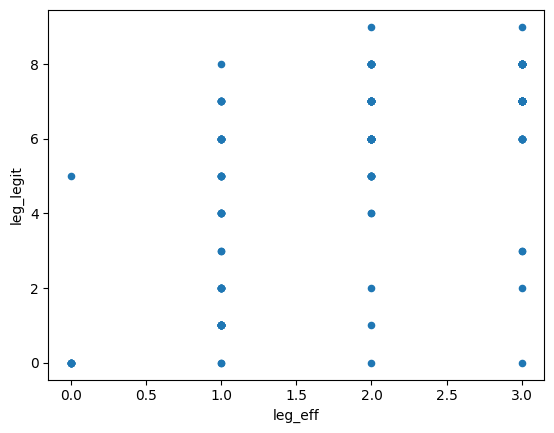

In [11]:
cnts_99.plot(kind='scatter', x='leg_eff', y='leg_legit')
#plt.xlim(-100,3000) # zoom in past the major outliers

That's not clear at all! Thankfully, the Spearman rank order correlation is simple enough in either SciPy or pingouin, and its interpretation is the same  the Pearson correlation: from $-1$ to $1$. You can call ScipPy's `st.spearmanr` function, and with pingouin, use `pg.corr` and specify `method=spearman` in the arguments. We won't bother you with any more hand-calculations, so don't worry about following along with any complex formulas. First we'll need vectors of the `leg_eff` and `leg_legit` variables. 

In [12]:
# create x and y vectors for leg_eff and leg_legit using 1999 data
leg_eff = cnts_99['leg_eff']
leg_legit = cnts_99['leg_legit']

# scipy method
coef, p = st.spearmanr(leg_eff, leg_legit) # here we assign coef and p, the two outputs of the function
coef

# pingouin method
pg.corr(leg_eff, leg_legit, method="spearman")

0.64262347958672

,n,r,CI95%,p-val,power
spearman,187,0.642623,"[0.55, 0.72]",3.614041e-23,1.0


The two ordinal variables on the effectiveness and legitimacy of country legislatures have a moderately strong positive correlation. A bit more specifically, higher ranks of ordinal values for one variable are associated with higher ranks in the values of the second variable. You might imagine that when the Cross-National Time-Series people assess a country's legislature based on their rubrics, countries who score a $3$ for legislature effectiveness will also be ranked higher in the three other variables that make up our `leg_legit` composite variable (Competitiveness of legislative nominating process, Party coalitions, Party legitimacy).

## Testing sample differences

This section we will introduce some basic conventions you will need to talk about your statistical tests like a social scientist. The reasoning behind the language and conventions are, again, better suited for a statistics course and we will be glossing over a lot of finer details. The broad reasoning behing these tests is that researchers are always studying _samples_ of the population: Researchers rarely ever have the time, money, or energy to study 100% of a population. A country;s population is too big and too spread apart; a population of people with a rare disease is not knowable among without coming in to a clinic; You cannot find and study every registered voter even at the county level without a lot of time and funds! So we sample people. And from that sample you can calculate a lot of statistics.  

#### Null-hypothesis
The first thing you will do when running a statistical test (or any scientific experiment) is to formulate a hypothesis. In statistics you commonly formulate a __null hypothesis__ that states there is zero, i.e. _null_, difference between your comparison samples. If you are testing the difference between two countries in your dataset, for example, your null hypothesis might generically be: "There is no difference between values of _X_ between country A and country B". 

#### Confidence
Next, you need to decide on a number to represent your confidence in the null hypothesis. Some percent probability that the null hypothesis is correct and that there is no difference. For completely random/social convention reasons in the history of science, that percent confidence is almost always 95%. The inverse of that 95% confidence, the remaining 5%, is the probability that the null_hypothesis is _wrong_ and that there _is_ a non-zero difference. We call that 5% __"alpha"__, and in decimals it is the number $0.05$. Once again, you can choose to be 95% confident with a 5% alpha, or $90:1$-, or $99:1$ and be really confident! The decision is yours to make, but it relies heavily on your knowledge of statistics; how statistics are influenced heavily by sample size, confounding variables, measurement error, bias, etc...

#### P
Finally, most if not all statistical tests and models give the user a p-value. That _p_ is the statistic that is measured against your _alpha_ and tells you whether your research shows differences between samples or not. Those differences are exciting, and researchers live and die, publish and perish, by these p-values. We would prefer you did none of these things, and instead understood p for what it is: an easily manipulated product of your research choices. A simple example: Beyond a threshold of around five thousand observations, p will almost always be less than 0.05 because minor differences between groups get inflated by the sample size. 

Another point is the size of the effect in the research. If a paper told you that people who drank tea lived longer than people who drank coffee, that would be pretty compelling! What if the sample difference in life expectancy was __0.3__ years? A statistically significant finding might be _greater_ than zero but it does not mean its _much greater_ than zero. Similarly, imagine a third group of people who drank only water had a life expectancy on average __2_ years greater than coffe drinkers and 1.8 years longer than tea drinkers? Then there might be something to these findings! Never forget to look carefully at effect size, the actual differences you have measured, and to keep those differences transparent and explicit when talking about your data.

In any case, here are examples of how we would use language around the null hypothesis, alpha, and p, which we will continue to use throughout the chapter. Say we want to see if Canadians weigh more than South Koreans. First we make a null hypothesis that individuals' weight is probably the same in Canada and South Korea: "The difference between both samples is zero". We also want to be 95% certain that this is true, and state that `alpha = 0`. You go and get data from public health records for a random sample of Canadians and South Koreans and run your test. If your test statistic comes back with a p-value below 0.05, you could say that you "reject the null hypothesis that there is no difference in weight between the two groups". Or alternatively, if p were greater than 0.05: "We fail to reject the null-hypothesis..."  

# T-tests

There are many kinds of tests we can perform across samples, which you can read about in the SciPy [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html#independent-sample-tests). We are going to introduce the one-sample T-test first, then the independent-samples T-test. The T-test is a robust and fairly ubiquitous test in all the the sciences. The first kind of T-test tells you about how your sample data compares to the broader "true" population (which exists but is physically impossible to measure in its entirety). The second kind of test exists to compare the difference between two groups in the sampled data. 

We will use Belgium and the Netherlands because they're relatively close enough in size, geography, and history that a comparison would be interesting. The t-test also requires continuous data, so we'll subset the population density variable `pop` into two vectors called `belgium` and `netherlands` and test whether population density was different between these neighboring countries for the independent samples t-test. We will also test if the population density of either belgium and the netherlands is statistically different from the population density of the larger population, i.e.: the world. 

In [13]:
belgium = cnts[cnts['country'].str.contains('BELGIUM')]['pop']
netherlands = cnts[cnts['country'].str.contains('NETHERLANDS')]['pop']

#### One Sample t-test
A one sample t-test looks at the mean of some variable (in our case it is population density) and compares it to the observed or hypothesized value of the population mean. We obtain that population mean from theory, prior knowledge, or previous data collection. The data set has observations for almost every country already, so getting the population density average from all the countries in the `cnts` data would be a fair approximation of the 'true' population mean. 

One small caveat: because the population densities of Blegium and the Netherlands come from the broader `cnts` data, we should actually remove all observations for these countries (one country per test) from the world data so that the country's observations do not cause any influence on the population mean we are testing against. 

This is a nice opportunity to teach you about _inverse_ subsetting in Python. In the previous code cell we subset for Belgium and then for the Netherlands. If you place a tilde `~` before parentheses in the subsetting argument, the tilde tells the function to give you everything _except_ the subset condition. So now we get every country except Belgium or the Netherlands

In [14]:
world_not_belgium = cnts[~(cnts['country'].str.contains('BELGIUM'))]['pop']
world_not_netherlands = cnts[~(cnts['country'].str.contains('NETHERLANDS'))]['pop']

Now we can test whether one country's population density mean is actually different from the population mean. First we state our null hypothesis for both tests that the sample mean is equal to the population mean. Alpha, confidence in the test statistic being greater than the population mean distribution, will be 95%, so $alpha=0.05$. 

Using Scipy's `.ttest_1samp()` function, we'll provide the `pop` variables for a country, then the mean value for the world minus that country. You can also tell the function to omit missing variables, and also specify the alternative null hypothesis with `alternative = two-sided`. Pingouin's `ttest()` function is much the same, though it has no explicit policy on missing values.

In [15]:
# test whether belgium's population density is greater than the world's mean pop density
st.ttest_1samp(belgium, np.mean(world_not_belgium), nan_policy='omit', alternative='two-sided')
pg.ttest(belgium, np.mean(world_not_belgium), alternative='two-sided')

# test the same for the netherlands
st.ttest_1samp(netherlands, np.mean(world_not_netherlands), nan_policy='omit', alternative='two-sided')
pg.ttest(netherlands, np.mean(world_not_netherlands), alternative='two-sided')


TtestResult(statistic=25.825694243618408, pvalue=2.2006987780989818e-60, df=168)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,25.825694,168,two-sided,2.200699e-60,"[607.32, 658.08]",1.986592,6.84e+56,1.0


TtestResult(statistic=10.767567204879724, pvalue=2.954164483821359e-21, df=183)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.767567,183,two-sided,2.954164e-21,"[534.63, 639.52]",0.793796,1.503e+18,1.0


The two tests show us p-values much smaller than our alpha, so you can reject the null hypothes that the sampled population density means are equal to the population mean. We can also use the confidence intervals to gain a similar insight. In a one sample test, the intervals represent the upper and lower values of probable _mean values_ of the variable in a theoretical distribution of means sampled from the true population. The sample mean for either Belgium or the Netherlands would be the mid-point on that confidence interval. 

Now let's compare actual sample means side by side in the code cell below. 

In [36]:
pd.concat([belgium,netherlands,cnts['pop']],axis=1, keys=['Belgium','Netherlands','World']).describe()

,Belgium,Netherlands,World
count,169.000000,184.000000,15583.000000
mean,632.700592,587.072283,304.240339
std,167.151349,360.560652,1605.582465
min,366.100000,200.000000,0.300000
25%,466.500000,265.675000,22.450000
50%,670.000000,433.950000,101.500000
75%,798.400000,923.575000,240.500000
max,897.800000,1261.300000,34000.000000


The world population density mean is actually a great deal smaller than either Belgium or the Netherlands. Now comparing the two individual countries, it seems Belgium and the Netherlands' population density is pretty similar. There seems to be a mean difference but the percentiles suggest that the Netherlands had larger variation than Belgium. Let's test if they are statistically different!

#### Independent samples
The independent samples t-test is a staple for testing whether observed values are equivalent between different groups in the data. For the test to be robust and credible, you must be sure to meet three basic assumptions. 

1. First we assume the variables have a normal distribution, which implies a continuous variable type. Histograms and Shapiro-Wilk test or the Kolmogorov-Smirnov test can corroborate if the variables are normal.
2. Assumption two is that both groups in the comparison are independent of each other. There is not quantitative test for this, you have to create the conditions for independent samples in your research design.
3. The final assumption is that variances are equivalent between either group, and for that you may use Levene’s test or Bartlett’s test to diagnose this assumption.

For now we will be unscientific and throw the data at the t-test. We'll also describe both vectors to see how similar they appear to be  For our t-test, you can follow convention by stating that you confidence will be represented by an _alpha_ of `0.05`. Both functions for SciPy (`st.ttest_ind`) and pingouin (`pg.ttest`) require two vectors of data to compare, so use the `belgium` and `netherlands` vectors for the yearly population density observations. 

One thing to consider for each function's correct estimation is to choose whether you wish to correct for unequal variance in each sample! We do not actually assume equal variances in the belgium and netherlands variables. Therefore, tell SciPy's ttest_ind() that `equal_var=False`, and tell pingouin's ttest() that `correction=False`.

In [17]:
# SciPy method returns a tuple with two values, t and p. 
st.ttest_ind(belgium, netherlands, equal_var=False)

# or pingouin's method which returns a dataframe
pg.ttest(belgium, netherlands, correction=True)

TtestResult(statistic=1.5452879811819562, pvalue=0.12347913913848714, df=262.9754928298016)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.545288,262.975493,two-sided,0.123479,"[-12.51, 103.77]",0.160171,0.37,0.322753


The p-value is clearly greater than the alpha, so you would fail to reject the null hypothesis that population density was different in Belgium and the Netherlands. We can also glean some more information from the confidence intervals: In a two sample test, the intervals represent the upper and lower values of the _mean difference_ between Belguim and the Netherlands in a theoretical distribution of means sampled from the true population. If you see the confidence interval could contain a value of zero, like we see here, then the probability of the mean difference being zero is within 95% likelihood. Here, the mid-point of the confidence interval represents the actual difference between the sample means: $632.7 - 587.1 = 45.6 = \frac{-12.51+103.77}{2}$

As an extra programming feature: you can even automate the p-value assessment by assigning the values given by the functions:

In [18]:
# create your alpha
alpha = 0.05

# assign the two-object tuple that ttest_ind generates
t, p = st.ttest_ind(belgium, netherlands)
# check with a logical statement
p < alpha

# make it an if-else statement for flair
if p < alpha: 
    print(p, "is less than", alpha, ': We can reject the null hypothesis that there is no difference between groups.')
else: print(p, "is greater than", alpha, ': We fail to reject the null hypothesis that there is no difference between groups.')

# try to run the same if else statement with a pingioun datafrme object!

#remove from student versions!!!
#df = pg.ttest(belgium, netherlands)
#df['p-val'] #prints the series
#df['p-val'].iloc[0] #prints the isolated float

#if df['p-val'].iloc[0] < alpha: 
#    print(df['p-val'].iloc[0], "is less than", alpha, ': We can reject the null hypothesis that there is no difference between groups.')
#else: print(df['p-val'].iloc[0], "is greater than", alpha, ': We fail to reject the null hypothesis that there is no difference between groups.')

False

0.1336588308238632 is greater than 0.05 : We fail to reject the null hypothesis that there is no difference between groups.


There is still a problem with our analysis: We really should have tested the assumptions of the t-test. A lot of researchers rely on the popularity of the t-test (same with many of the more popular statistical methods available) and fail to address how their data comply with the basic assumptions for the procedure. We are here to teach you best practices and we shall do so through example.

### Reassessing t-test assumptions

#### Normality
Often people like to look at their data visually to get a feeling for how "normal" a variable appears. This is a good first step, but you can actually test the normality of an entire dataframe with the pingouin `.normality()` function. This is extremely handy if you have some ideas about what variables you want to test but need a quick scan to corrborate. You can provide an entire dataframe or just a vector. Pay attention to the warning that the '.normality()' function puts out.

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Population Density - Belgium')

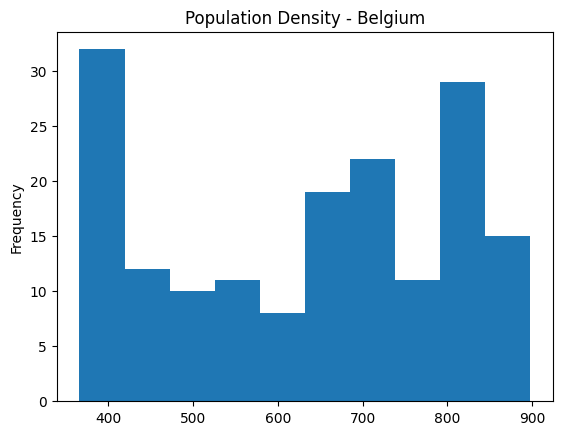

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Population Density - Netherlands')

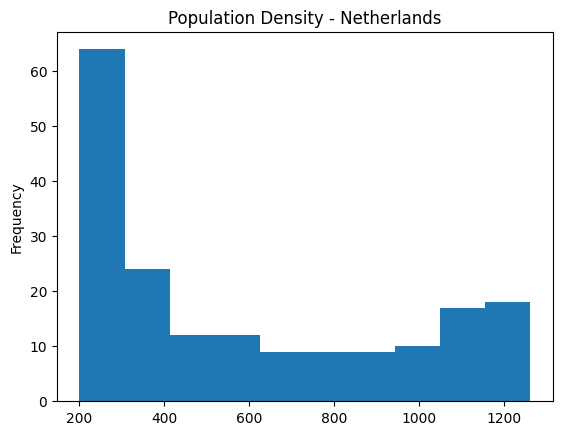

In [19]:
belgium.plot(kind='hist')
plt.title('Population Density - Belgium')
plt.show()
netherlands.plot(kind='hist')
plt.title('Population Density - Netherlands')

In [20]:
pg.normality(belgium, method="shapiro") # method='shapiro' is a default value. Output is the same if we omit it
pg.normality(netherlands, method="shapiro")

# you may test an entire dataframe too
pg.normality(cnts)

,W,pval,normal
pop,0.917018,3.213722e-08,False


,W,pval,normal
pop,0.85303,2.453041e-12,False


/home/fernando/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
year,0.879723,0.0,False
gdp,0.518956,0.0,False
legis03,0.853941,0.0,False
legis04,0.803430,0.0,False
legis05,0.772929,0.0,False
legis06,0.769324,0.0,False
legis08,0.881712,0.0,False
leg_eff,0.863500,0.0,False
pop2,0.114504,0.0,False
pop,0.114504,0.0,False


The variables did not pass either visual or statistical test of normality. In all of the normality tests above, none of the data were normal, yet all of the p-values are tiny. This is because the sample size is very large, thus the red text message warning us that the "p-value may not be accurate". This is another reminder that p-values are useful but easily manipulated. 

#### Independence

The assumption of independence is a logical or philosophical one. By independence we are talking about statistical independence: That the observations in one sample (Belgium) in no way influence our observations for the other sample (Netherlands). Does this sound like a fair logical assumption about our data? Does the population density of Belgium have no influence on the population density of the Netherlands in either direction? We don't have a good answer because we are not historians or economists. It could be that historical conflicts and economic trends have moved populations in either country because they are both so close to one another. Some regions of Belgium and Netherlands even speak the same language. But does this negate statistical independence regarding _population density_? In the case of countries with distinct enough histories, the assumption is probably fine, but in your own research, really think about how your individuals can cross over and influence another group you are studying. If they are not independent, rest assured there are other statistical tests for that.


#### Equal Variance

Equal variance can be measured with the Levene test for equality of variance. SciPy's test is a bit simpler to use than pingouin's `.homoscedasticity()` function, so we'll stick to the `st.levene()` function. You will get a statistic and a p-value with which to decide whether the test passes your threshold of confidence in the null hypothesis. Remember that our null hypothesis is about _null_ difference. In other words, our null hypothesis is that variances are equal. We will again set alpha to $0.05$.

In [21]:
stat, p = st.levene(belgium,netherlands)
p
p < 0.05

9.422848220581645e-15

True

The p-value is lower than 0.05, meaning we should reject the null hypothesis that group variances are equal. At least two of the assumptions for performing the t-test are violated when comparing population density between the Netherlands and Belgium. 

### Mann-Whitney U Test
If your groups are independent but your data are not normally distributed, then a Mann-Whitney U test takes the place of the t-test. We have already gotten a look at the ordinal `leg_eff` and `leg_legit` variables when we calclated the Spearman correlation for non-continuous variables and found that they had a positive correlation. Now let us assess whether the measurements of legislative effectiveness (`leg_eff`) was different between two independent groups, Belgium and the Netherlands.

In [22]:
# re-create group variables for belgium and the netherlands
belgium_leg = cnts[cnts['country'].str.contains('BELGIUM')]['leg_eff']
netherlands_leg = cnts[cnts['country'].str.contains('NETHERLANDS')]['leg_eff']

You can call SciPy's `mannwhinteyu()` or pingouin's `mwu` functions. We also specify the argument `alternative='two-sided'` in the code cell, which is actually just the default test. The two-sided argument means that we are testing a null hypothesis that the mean values of population density are equal. We could also specify a null hypothesis that _x_ is less, or that _x_ is greater than group _y_ with the arguments 'less' and 'greater', respectively. 

In [23]:
# SciPy method
st.mannwhitneyu(belgium_leg, netherlands_leg, alternative="two-sided")
U, p = st.mannwhitneyu(belgium_leg, netherlands_leg, alternative="two-sided")
p < 0.05 # If true we reject the null-hypothesis; if false we do not reject the null-hypothesis

# pingouin method
pg.mwu(belgium_leg, netherlands_leg, alternative='two-sided')

MannwhitneyuResult(statistic=nan, pvalue=nan)

False

,U-val,alternative,p-val,RBC,CLES
MWU,10143.5,two-sided,1.785783e-10,0.324802,0.337599


With an alpha of $0.05$, the Mann-Whitney U test provided a higher p-value. Thus, we fail to reject the null hypothesis that legislative effectiveness was the same between Belgium and the Netherlands. How similar were they? Let's check using .describe() on each vector again.

In [38]:
pd.concat([belgium_leg, netherlands_leg], axis=1, keys=['Belgium','Netherlands']).describe()

,Belgium,Netherlands
count,166.000000,181.000000
mean,2.481928,2.817680
std,0.536237,0.387179
min,0.000000,2.000000
25%,2.000000,3.000000
50%,2.000000,3.000000
75%,3.000000,3.000000
max,3.000000,3.000000


So Belgium has a historically lower average value of legislative effectiveness (remember the cnts data's observations are years) than the Netherlands. However, when considering the variation between the ordinal values of effectiveness, which go from rank "0" to rank "3", the Mann-Whitney U test states that it is not probable that either country's measure of legislative effectiveness would be greater than the other's. 

If you have your own hypothesis about different countries in the dataset, try testing the null hypothesis for different sets of countries yourself. 

## Linear Regression

The last statistical method you'll read about is simple linear regression. Another name for 'simple' would be 'bivariate' regression where you analyze the relationship between just two variables. Bivariate regression is _very_ closely related to correlation analysis in that you are comparing the association with two variables and deriving the statistics with the exact same math. There is, however a big conceptual difference. When we talk about the relationship between _x_ and _y_ in correlation, we mean the general direction (positive or negative) and how sharply the clusters of observations rise or fall on the y-axis. In regression analysis, we are concerned about the _predictive_ association that _x_ has on _y_; there is a clear causal argument being made here as opposed to a plain correlation. 

Thus, you call one of the variables the _independent_ variable, $x$. This is the one that is not influenced (in theory) by another variable in your data. Then you have the _dependent_ variable, $y$, which is influenced by and depends on $x$ (again in theory). The regression procedure tests that relationship giving you statistics that create a __line__ across your observations that represents the "predicted value" of $y$ at every value of $x$, based on all the observed values of $y$ over $x$ and their deviations from the mean. Let's look at a regression of population density on GDP, or how population density is predicted by GDP. 

In SciPy you use the `st.linregress()` function which requires two vectors: The independent variable first, and the indepedent variable second. You will need separate vectors for this function, so use the previously created `gdp` and `pop` objects pulled from cnts_99.

In [25]:
result_st = st.linregress(gdp, pop)
result_st

LinregressResult(slope=0.05750132279917799, intercept=229.76970983352408, rvalue=0.20328865893895054, pvalue=0.005262841887400634, stderr=0.020361709256681848, intercept_stderr=226.23722490373495)

This is very sparse output for the SciPy linregress() function and fairly hard to read, especially if you are less familiar with regression coefficients. Pingouin's output as you have come to expect is in the shape of a dataframe with column titles and row indeces. It also includes many more useful statistics for us to ponder. The function is `pg.linear_regression` and it is almost identical to st.linregress(). 

You will need to declare the independent variable with an uppercase `X=` argument, and the dependent variable with a lowercase `y=` argument. Assigning the output to an object gives you a pandas dataframe object to reference. If you need to pull the coefficients to use later, you would need to do so with subsetting and indexing. 

In [26]:
result_pg = pg.linear_regression(X=gdp, y=pop)
result_pg

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,229.769710,226.237225,1.015614,0.311140,0.041326,0.036144,-216.566912,676.106332
1,gdp,0.057501,0.020362,2.823993,0.005263,0.041326,0.036144,0.017330,0.097672


### Regression outputs

First let's go over the coefficients from the pingouis linear_regression() function. Once you become familiar with these terms, the SciPy linregress() function's output will be much clearer. The regression statistics are:

- Intercept, or $a$ coefficient: The value of $y$ when $x=0$. In other words, it is where the line crosses 0 on the x-axis.
- Slope for `gdp`, the $b$ coefficient: This is how steeply the regression line increases or decreases for every single unit you move up along the x-axis.

For each of the two coefficients in our model, the intercept and slope, pingouin also provides a series of statistics that describe and qualify them.

- Coef, the actual regression statistic for each variable we placed into our model.
- SE, standard error of the coefficient: How far the coefficient's estimate might be from the "true" population value.
- T is the statistic for the 'number of standard errors' away from zero. T-Values greater than 2 or less than -2 usually mean your p-value will be smaller than your alpha. 
- Pval, p-value or percent likelihood that your coefficient would be zero in the true population.
- R2, R-squared is the correlation coefficient $r$ squared. You can check using the $r$ that you calculated at the start or this chapter. $R^2$ is a percentage, from 0 to 1, of how much of the variance in $Y$ is predicted by our model.
- Adj_r2, adjusted R-squared is 'adjusted' by the number of predictor variables in the model, which is an important step because the _un_-adjusted R-squared always increases as you add predictor variables, even if those variables were completely unrelated to the dependent variable.
- CI are the lower and upper bounds of the plausible distribution of the coefficient in the true population. They almost always represent the density of 95% of the plausible values, which is why you see CI 2.5% and CI 97.5%. If zero is within the lower and upper values, then it is not likely our test statistic will be able to reject the null hypothesis.

We can plot gdp and population density and then print our regression line over it so you can get a visual understanding of what the intercept and slope coefficients actually do. After making the scatterplot, you can create a second plot to overlay a line that starts at the intercept (we use the `result_pg['coef'][0]` object). The angle of the line is the `result['coef'][1]` object times gdp. If you remember geometry class, you have just plotted $y=bx+a$ 

<Axes: xlabel='gdp', ylabel='pop'>

(-100.0, 4000.0)

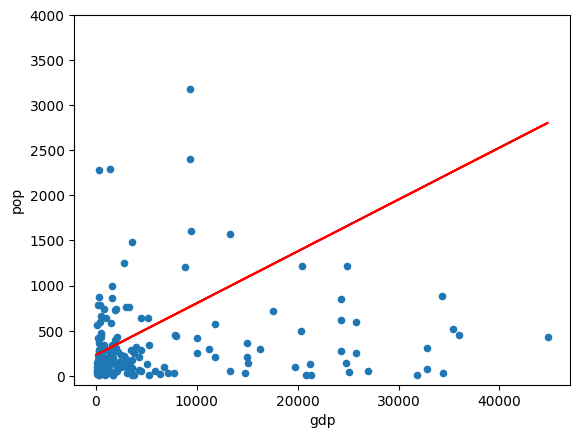

In [27]:
cnts_99.plot(kind='scatter', x='gdp', y='pop')
plt.ylim(-100,4000) # zoom in past the major outliers
plt.plot(gdp, result_pg['coef'][0] + result_pg['coef'][1]*gdp, 'r')
plt.show()

We can do the exact same using the SciPy `result_st` object too. The way that you may call the intercept and slope coefficients are very different, however, because the `st.linregress()` function's output is a tuple python object instead of a pandas dataframe. These would thus be called with `result_st.intercept` and `result_st.slope`, respectively. 

<Axes: xlabel='gdp', ylabel='pop'>

(-100.0, 4000.0)

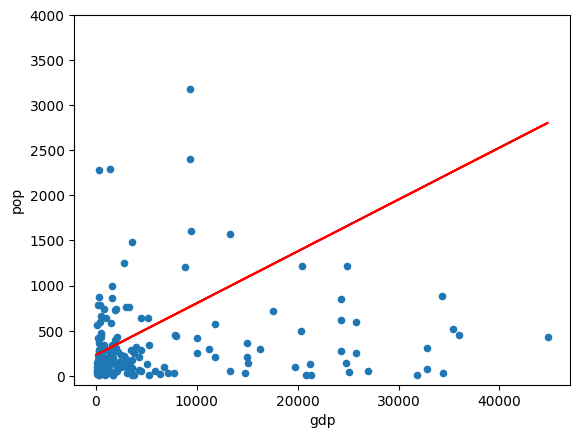

In [28]:
cnts_99.plot(kind='scatter', x='gdp', y='pop')
plt.ylim(-100,4000) # zoom in past the major outliers
plt.plot(gdp, result_st.intercept + result_st.slope*gdp, 'r')
plt.show()

So what does this tell us? If you were making the claim that GDP predicts the density of a country's population, then the regression quantifies _how much_ GDP influences population density. The most important statistic would be the slope parameter $b$, which equals $0.058$. The number is small but remember these quantities are relative to $x$ and $y$. The $b$ parameter says that when GDP goes up by _one_ (whatever one GDP means), then population density goes up by 0.058 persons per square kilometer.

We also say it is predictive because the linear function $y = bx + a$ gives us a way to estimate what $y$ will equal if we provide some value of $x$. So if a country with no data appeared, and you went and estimated their GDP per capita, you could then estimate what their population density would be in light of all other countries in the data. This is particularly useful in scenarios where researchers and analysts are modelling things like risk, disease, health indicators, test scores, etc... With a good model in hand, they can predict where a person's score might fall given some measured indicators like grades, or healthy habits. This is also how tech companies decide to target ads your way.

A note on the final $R^2$ statistic: `linregress` provided $r$, and `linear_regression` gave $R^2$. The square of the correlation coefficient $r$ is $R^2$, and it tells us how well our model fits with the observed data, or how much the model explains the variation/distance of the observations of $y$ away from the regression line. Just so we are clear, our model is a very simple expression $Y=$, $R^2 = 0.042$, so the model explains 4.2 percent of the variance in the data. This is not a comprehensive model! It is the responsibility of the social science researcher to understand the data, the theory behind the variables, and the design of a study if there is an experiment in place. With knowledge of your field you can determine ahead of time what variables logically influence others versus what variables simply correlate without any causal mechanisms. In short, do not put the carriage (regression models) in front of the horse (data collection): Know your theory and _then_ test it.

# To-do

- one sample t-test
- make an assignment question that you add the corelation coefficient to plot in an annotation.


https://python.cogsci.nl/numerical/statistics/#libraries-for-statistics <- nice reference comparing statsmodels and pingouin 

